In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.datasets import cifar10
from keras.losses import SparseCategoricalCrossentropy
import cv2

In [53]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [54]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [55]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [56]:
x_train = x_train / 255
x_test = x_test / 255

In [150]:
classes = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [151]:
classes

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

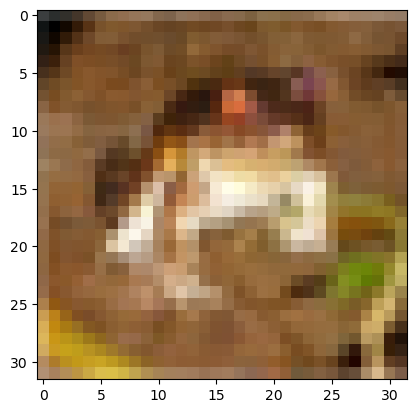

In [59]:
plt.imshow(x_train[0])

### Building Model

In [83]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape = (32,32,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

In [85]:
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [86]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4666 - accuracy: 0.4702
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0503 - accuracy: 0.6307
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8913 - accuracy: 0.6861
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7966 - accuracy: 0.7194
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7329 - accuracy: 0.7422
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6808 - accuracy: 0.7611
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6306 - accuracy: 0.7782
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5931 - accuracy: 0.7893
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5573 - accuracy: 0.8027
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [160]:
print("Accuracy on Train Data:",0.8150)

Accuracy on Train Data: 0.815


### Model Evaluation

In [161]:
model.evaluate(x_test,y_test)
print("Accuracy on Test Data:",0.7468)

313/313 [==============================] - 2s 6ms/step - loss: 0.7775 - accuracy: 0.7468
Accuracy on Test Data: 0.7468


In [97]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [98]:
y_pred = [np.argmax(i) for i in y_pred]

### Testing with images

In [129]:
test1 = cv2.imread("test1.jpg").reshape(-1,32,32,3)

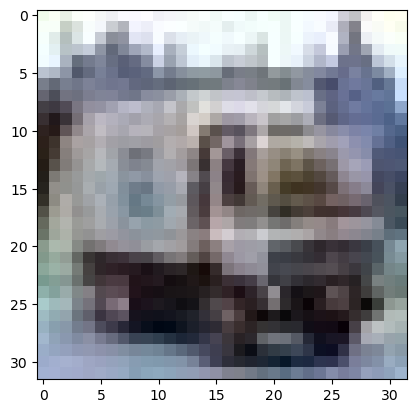

In [130]:
plt.imshow(test1.reshape(32,32,3))

In [158]:
pred1 = np.argmax(model.predict(test1))
print("Predicted:",pred1)
print("Actual:",y_test[11])
print("Predicted class:",classes[pred1])
print("Actual class:",classes[y_test[11]])

1/1 [==============================] - 0s 14ms/step
Predicted: 9
Actual: 9
Predicted class: truck
Actual class: truck


In [133]:
test2 = cv2.imread("test2.jpg").reshape(-1,32,32,3)

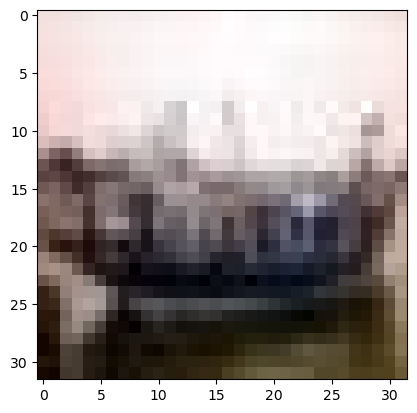

In [134]:
plt.imshow(test2.reshape(32,32,3))

In [157]:
pred2 = np.argmax(model.predict(test2))
print("Predicted:",pred2)
print("Actual:",y_test[18])
print("Predicted class:",classes[pred2])
print("Actual class:",classes[y_test[18]])

1/1 [==============================] - 0s 15ms/step
Predicted: 8
Actual: 8
Predicted class: ship
Actual class: ship


In [137]:
test3 = cv2.imread("test3.jpg").reshape(-1,32,32,3)

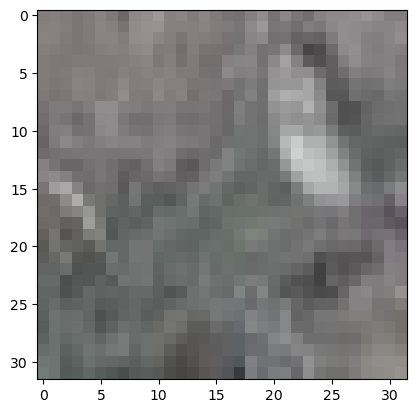

In [138]:
plt.imshow(test3.reshape(32,32,3))

In [156]:
pred3 = np.argmax(model.predict(test3))
print("Predicted:",pred3)
print("Actual:",y_test[183])
print("Predicted class:",classes[pred3])
print("Actual class:",classes[y_test[183]])

1/1 [==============================] - 0s 14ms/step
Predicted: 3
Actual: 2
Predicted class: cat
Actual class: bird
